In [2]:
import pickle
import pandas as pd
import numpy as  np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
import scipy.special as sp

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
#!pip install pymc

In [4]:
#! pip install arviz

## Data

In [5]:
df=pd.read_csv('data/raw/se_2024.csv')
df.shape

(43909, 13)

In [6]:
df.head(10)

,EKSAMI_SOORITAJA,KUUPAEV,BYROO,KATEGOORIA,ERITINGIMUSED,VIIMANE_AUTOKOOL,SOIDUOPETAJA_KAASAS,EKSAMINEERIJA,SEISUND,KESTUS,KATK_POHJUS,MITTEARVESTATUD,VEAD
0,36e54db01a37a8f5,2024-01,Tartu,B,101,OÜ Ropka Autokool,E,844452b4e4bac2ef,SOORITATUD,40.0,NaN,NaN,NaN
1,b38123be4193be90,2024-03,Rapla,B,96,NaN,E,d15d81b55baf64ed,MITTE_SOORITATUD,4.0,NaN,FOORID_MARGID|LIIKLUSREEGLID|PAIKNEMINE|TAHELE...,NaN
2,ee2c9e66a276f962,2024-01,Narva,B,101,Mittetulundusühing NARVA AUTOM,E,166c8268fe1b2ec1,SOORITATUD,39.0,NaN,NaN,NaN
3,190cb2e0b176a996,2024-01,Jõhvi,B,101,Osaühing Ida-Virumaa Autokool,E,d67d168bc8d04278,MITTE_SOORITATUD,22.0,NaN,JUHTIMISSEADMETE_KASUT|PARKIMINE_ROOPSELT,OHUSTAMINE
4,ab3a552e59dff9d6,2024-01,Võru,B,101,Tugev Partner OÜ,E,bf2b7218d36e2a3d,SOORITATUD,41.0,NaN,NaN,NaN
5,ddfdb2eca8656d25,2024-01,Jõhvi,B,101|78,Aktsiaselts Odium,E,268b141c418a500d,SOORITATUD,45.0,NaN,NaN,NaN
6,6dbb806b314b7796,2024-01,Põlva,B,101,Tugev Partner OÜ,E,bf2b7218d36e2a3d,SOORITATUD,42.0,NaN,NaN,NaN
7,58cb7cf8259fa460,2024-01,Jõhvi,B,101,Osaühing Viru AUTOM,E,d67d168bc8d04278,MITTE_SOORITATUD,14.0,NaN,JUHTIMISSEADMETE_KASUT,NaN
8,6d677f8e0ff30e61,2024-01,Narva,B,101,"Igor Ivanovski, Autokool BRAVO",E,166c8268fe1b2ec1,MITTE_SOORITATUD,21.0,NaN,PARKIMINE_MANOOVRIGA|SOIDUVOTTED,VALESTI_PARGITUD
9,4a2c8e2943064ac3,2024-01,Tartu,B,101,VPK Koolitus OÜ,E,ea58f592917668cf,MITTE_SOORITATUD,27.0,NaN,EESOIGUS,NaN


In [7]:
df.describe(include='all')

,EKSAMI_SOORITAJA,KUUPAEV,BYROO,KATEGOORIA,ERITINGIMUSED,VIIMANE_AUTOKOOL,SOIDUOPETAJA_KAASAS,EKSAMINEERIJA,SEISUND,KESTUS,KATK_POHJUS,MITTEARVESTATUD,VEAD
count,43909,43909,43909,43909,32100,41841,42686,43909,43909,42601.000000,1311,18875,4377
unique,25761,11,16,13,10,303,2,43,4,NaN,7,1455,210
top,824c9fe0db89d0c6,2024-05,Tallinn,B,101,OÜ AUTOSÕIT,E,b353c311e671711a,SOORITATUD,NaN,EI_ILMUNUD,LIIKLUSOHUTUS,AJA_YLETAMINE
freq,15,4473,17008,31517,23270,4287,38376,1308,23713,NaN,621,2778,644
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.662191,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.599972,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.000000,NaN,NaN,NaN


## cols2keep

In [8]:
df_b=df[(df.KATEGOORIA=='B')&(df.SEISUND.isin(['MITTE_SOORITATUD', 'SOORITATUD']))]
df_b.shape

(30476, 13)

In [9]:
COLS2KEEP=['KUUPAEV', 'BYROO', 'ERITINGIMUSED','VIIMANE_AUTOKOOL','SOIDUOPETAJA_KAASAS', 'EKSAMINEERIJA', 'SEISUND']

In [10]:
df_b_sub=df_b[COLS2KEEP]

In [11]:
df_b_sub.head(10)

,KUUPAEV,BYROO,ERITINGIMUSED,VIIMANE_AUTOKOOL,SOIDUOPETAJA_KAASAS,EKSAMINEERIJA,SEISUND
0,2024-01,Tartu,101,OÜ Ropka Autokool,E,844452b4e4bac2ef,SOORITATUD
1,2024-03,Rapla,96,NaN,E,d15d81b55baf64ed,MITTE_SOORITATUD
2,2024-01,Narva,101,Mittetulundusühing NARVA AUTOM,E,166c8268fe1b2ec1,SOORITATUD
3,2024-01,Jõhvi,101,Osaühing Ida-Virumaa Autokool,E,d67d168bc8d04278,MITTE_SOORITATUD
4,2024-01,Võru,101,Tugev Partner OÜ,E,bf2b7218d36e2a3d,SOORITATUD
5,2024-01,Jõhvi,101|78,Aktsiaselts Odium,E,268b141c418a500d,SOORITATUD
6,2024-01,Põlva,101,Tugev Partner OÜ,E,bf2b7218d36e2a3d,SOORITATUD
7,2024-01,Jõhvi,101,Osaühing Viru AUTOM,E,d67d168bc8d04278,MITTE_SOORITATUD
8,2024-01,Narva,101,"Igor Ivanovski, Autokool BRAVO",E,166c8268fe1b2ec1,MITTE_SOORITATUD
9,2024-01,Tartu,101,VPK Koolitus OÜ,E,ea58f592917668cf,MITTE_SOORITATUD


In [12]:
# df_b_sub.head(10).to_dict()

In [13]:
df_b_sub.describe(include='all')

,KUUPAEV,BYROO,ERITINGIMUSED,VIIMANE_AUTOKOOL,SOIDUOPETAJA_KAASAS,EKSAMINEERIJA,SEISUND
count,30476,30476,29578,29497,30476,30476,30476
unique,11,16,7,289,2,42,2
top,2024-11,Tallinn,101,OÜ AUTOSÕIT,E,baa43a4ad02e3a60,MITTE_SOORITATUD
freq,3088,11699,21741,3087,26573,1151,15976


In [14]:
df_b_sub.SEISUND.value_counts()

SEISUND
MITTE_SOORITATUD    15976
SOORITATUD          14500
Name: count, dtype: int64

In [15]:
df_b[df_b.SEISUND=='KATKESTATUD']

,EKSAMI_SOORITAJA,KUUPAEV,BYROO,KATEGOORIA,ERITINGIMUSED,VIIMANE_AUTOKOOL,SOIDUOPETAJA_KAASAS,EKSAMINEERIJA,SEISUND,KESTUS,KATK_POHJUS,MITTEARVESTATUD,VEAD


## Recode y

In [16]:
df_b_sub['y']=df_b_sub.SEISUND.replace({'SOORITATUD':1.0, 'MITTE_SOORITATUD':0.0})

/tmp/ipykernel_2678/645445151.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_b_sub['y']=df_b_sub.SEISUND.replace({'SOORITATUD':1.0, 'MITTE_SOORITATUD':0.0})
/tmp/ipykernel_2678/645445151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_b_sub['y']=df_b_sub.SEISUND.replace({'SOORITATUD':1.0, 'MITTE_SOORITATUD':0.0})


In [17]:
epsilon = 1e-6  # small constant
df_b_sub['y_transformed'] =df_b_sub['y']* (1 - 2*epsilon) + epsilon

/tmp/ipykernel_2678/4272676741.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_b_sub['y_transformed'] =df_b_sub['y']* (1 - 2*epsilon) + epsilon


## Extract time variables

In [18]:
df_b_sub['week']=pd.to_datetime(df_b_sub.KUUPAEV).dt.isocalendar().week
df_b_sub['month']=pd.to_datetime(df_b_sub.KUUPAEV).dt.month
df_b_sub['dow']=pd.to_datetime(df_b_sub.KUUPAEV).dt.dayofweek

/tmp/ipykernel_2678/697096642.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_b_sub['week']=pd.to_datetime(df_b_sub.KUUPAEV).dt.isocalendar().week
/tmp/ipykernel_2678/697096642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_b_sub['month']=pd.to_datetime(df_b_sub.KUUPAEV).dt.month
/tmp/ipykernel_2678/697096642.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [19]:
# Now create the cyclical features for month
df_b_sub['month_sin'] = np.sin(2 * np.pi * df_b_sub['month']/12)
df_b_sub['month_cos'] = np.cos(2 * np.pi * df_b_sub['month']/12)

# Let's look at the first few rows to see the result
df_b_sub[['KUUPAEV', 'month', 'month_sin', 'month_cos']].head()

,KUUPAEV,month,month_sin,month_cos
0,2024-01,1,0.5,8.660254e-01
1,2024-03,3,1.0,6.123234e-17
2,2024-01,1,0.5,8.660254e-01
3,2024-01,1,0.5,8.660254e-01
4,2024-01,1,0.5,8.660254e-01


In [20]:
# Create cyclical features for week
df_b_sub['week_sin'] = np.sin(2 * np.pi * df_b_sub['week']/52)
df_b_sub['week_cos'] = np.cos(2 * np.pi * df_b_sub['week']/52)

In [21]:
# Create cyclical features for week
df_b_sub['day_sin'] = np.sin(2 * np.pi * df_b_sub['dow']/7)
df_b_sub['day_cos'] = np.cos(2 * np.pi * df_b_sub['dow']/7)

<Axes: xlabel='week'>

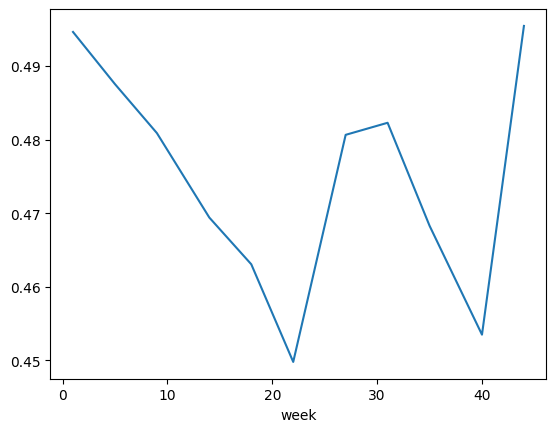

In [22]:
df_b_sub.groupby(['week'])['y'].mean().plot()

<Axes: xlabel='month'>

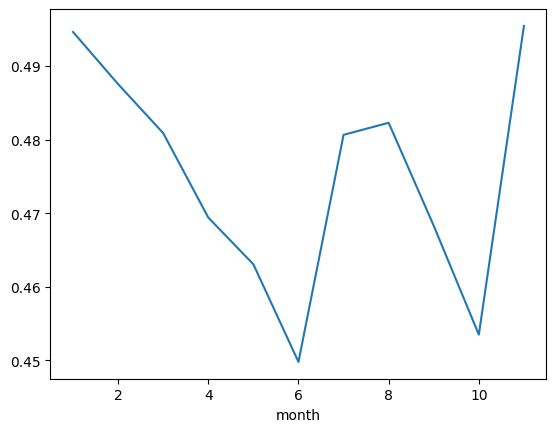

In [23]:
df_b_sub.groupby(['month'])['y'].mean().plot()

In [24]:
df_b_sub.dow.value_counts()

dow
0    8545
4    5887
3    5345
1    2955
2    2868
6    2806
5    2070
Name: count, dtype: int64

In [25]:
time_features = ['month_sin', 'month_cos']
df_b_sub[time_features] = (df_b_sub[time_features] - df_b_sub[time_features].mean()) / df_b_sub[time_features].std()

## Recode others

In [26]:
# Fill missing values with 'UNKNOWN'
df_b_sub['VIIMANE_AUTOKOOL'] = df_b_sub['VIIMANE_AUTOKOOL'].fillna('UNKNOWN')

count_examiner=df_b_sub['EKSAMINEERIJA'].str.lower().value_counts()
examiners2keep=count_examiner[count_examiner>20].index
df_b_sub['EKSAMINEERIJA_CLEAN'] = np.where(df_b_sub['EKSAMINEERIJA'].isin(examiners2keep), df_b_sub['EKSAMINEERIJA'], 'grupp')
# Create numeric indices for categorical variables
examiner_to_idx = {examiner: idx for idx, examiner in enumerate(df_b_sub['EKSAMINEERIJA_CLEAN'].unique())}
idx_to_examiner={v:k for k,v in examiner_to_idx.items()}
school_to_idx = {school: idx for idx, school in enumerate(df_b_sub['VIIMANE_AUTOKOOL'].str.lower().unique())}
idx_to_school={v:k for k,v in school_to_idx.items()}

# Convert categories to indices
df_b_sub['examiner_idx'] = df_b_sub['EKSAMINEERIJA_CLEAN'].map(examiner_to_idx)
df_b_sub['school_idx'] = df_b_sub['VIIMANE_AUTOKOOL'].str.lower().map(school_to_idx)

# Convert target to binary
df_b_sub['passed'] = (df_b_sub['SEISUND'] == 'SOORITATUD').astype(int)

In [27]:
count_schools=df_b_sub['VIIMANE_AUTOKOOL'].str.lower().value_counts()
count_schools[count_schools>20]

VIIMANE_AUTOKOOL
oü autosõit                3087
osaühing aide autokool     1318
atlanta autokool oü        1134
unknown                     979
zebra auto-moto kool oü     907
                           ... 
lähte ühisgümnaasium         23
mareki autokool oü           23
ecodrive eesti oü            23
divesar oü                   22
osaühing kiivi autokool      21
Name: count, Length: 155, dtype: int64

In [28]:
count_examiner#[count_examiner>20]

EKSAMINEERIJA
baa43a4ad02e3a60    1151
b6982cbd7a6000e4    1127
3d6f4cd3cca10b28    1094
213d8a3fa533a2ce    1086
844452b4e4bac2ef    1048
c6d0f1ea0c1f7aec    1048
31451a368e962058    1000
268b141c418a500d     884
a1d9e404aeec83d1     882
d67d168bc8d04278     862
166c8268fe1b2ec1     850
b353c311e671711a     842
ea58f592917668cf     796
f6097462dafbd97c     795
01be6f2aa5cba2cd     791
9f3e3d07ecb6a86c     787
be39b89bc70a335e     780
bf2b7218d36e2a3d     778
4b9e369e12d8f969     776
075e15cf091d347b     774
b89f5e763b05e7a7     774
ff4d9b9b519322e3     737
602d00a56a9a8757     732
a90a6cc35a006268     715
c347692cf48342d6     701
5f2e29794998d365     662
12ed0758e403a7d6     650
32a030820e9d4091     646
ae264be409f2ca9f     643
4141299ff500eb11     638
5c9ee299be483144     632
4ee4a4702131dac3     607
0f8b5f7ee00be8ae     604
d321254aa86edd96     564
d15d81b55baf64ed     550
147b5bf6bba0d0f1     550
e14095bf73a253c7     531
4fb83c2d4f79eb33     501
c74b0de43bcd0b0f     453
b3e368548c2

In [29]:
# First create index mapping for BYROO
byroo_to_idx = {byroo: idx for idx, byroo in enumerate(df_b_sub['BYROO'].unique())}
idx_to_byroo={v:k for k,v in byroo_to_idx.items()}

n_byroos = len(byroo_to_idx)

# Convert BYROO to indices
df_b_sub['byroo_idx'] = df_b_sub['BYROO'].map(byroo_to_idx)

In [30]:
# Get dimensions for our hierarchical components
n_examiners = len(examiner_to_idx)
n_schools = len(school_to_idx)

In [31]:
n_examiners

41

## Model

In [43]:
# Create the model
with pm.Model() as model:
    # Global intercept
    intercept = pm.Normal('intercept', mu=0, sigma=0.1)
    
    # Hierarchical priors for examiners and schools
    #examiner_sigma = pm.HalfStudentT('examiner_sigma', nu=3, sigma=0.05)
    #examiner_effects = pm.Normal('examiner_effects', mu=0, sigma=examiner_sigma, shape=n_examiners)
    # Non-centered parameterization for examiner effects
    #examiner_sigma = pm.HalfStudentT('examiner_sigma', nu=3, sigma=0.05)
    examiner_sigma = pm.HalfCauchy('examiner_sigma', beta=0.1)
    examiner_raw = pm.Normal('examiner_raw', mu=0, sigma=1, shape=n_examiners)
    examiner_effects = pm.Deterministic('examiner_effects', examiner_raw * examiner_sigma)
    
    #school_sigma = pm.HalfStudentT('school_sigma', nu=3, sigma=0.5)
    #school_effects = pm.Normal('school_effects', mu=0, sigma=school_sigma, shape=n_schools)
    # Non-centered parameterization for schools
    school_sigma = pm.HalfStudentT('school_sigma', nu=3, sigma=0.5)
    school_raw = pm.Normal('school_raw', mu=0, sigma=1, shape=n_schools)
    school_effects = pm.Deterministic('school_effects', school_raw * school_sigma)
    
    #byroo_sigma = pm.HalfStudentT('byroo_sigma', nu=3, sigma=0.1)
    #byroo_effects = pm.Normal('byroo_effects', mu=0, sigma=byroo_sigma, shape=n_byroos)
    # Non-centered parameterization for byroo
    byroo_sigma = pm.HalfStudentT('byroo_sigma', nu=3, sigma=0.1)
    byroo_raw = pm.Normal('byroo_raw', mu=0, sigma=1, shape=n_byroos)
    byroo_effects = pm.Deterministic('byroo_effects', byroo_raw * byroo_sigma)
    
    # Combined time effects with tighter prior
    time_betas = pm.Normal('time_betas', mu=0, sigma=0.5, shape=2)
    
    # Combine all predictors
    logit = (intercept + 
             examiner_effects[df_b_sub['examiner_idx']] +
             school_effects[df_b_sub['school_idx']] +
             byroo_effects[df_b_sub['byroo_idx']] +
             pm.math.dot(df_b_sub[time_features], time_betas)
            )
    
    # Likelihood
    #y = pm.Bernoulli('y', logit_p=logit, observed=df_b_sub['passed'])
    
     # Transform mu to be between 0 and 1
    mu_bounded = pm.math.invlogit(logit)
    
    # Use transformed data with Beta likelihood
    alpha = pm.HalfNormal('alpha', sigma=1)
    y = pm.Beta('y', 
                    alpha=mu_bounded*alpha, 
                    beta=(1-mu_bounded)*alpha, 
                    observed=df_b_sub['y_transformed'])

## Sample

In [46]:
with model:
    # Initialize the sampler
    # Using NUTS (No U-Turn Sampler) which is good for continuous parameters
    trace = pm.sample(
        draws=4000,          # Number of samples to draw
        tune=4000,           # Number of tuning steps
        chains=4,            # Number of chains to run
        init='advi',  
        return_inferencedata=True,
        target_accept=0.95    # Target acceptance rate
    )

Initializing NUTS using advi...


Output()

Convergence achieved at 27800
Interrupted at 27,799 [13%]: Average Loss = -2.7651e+05
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, examiner_sigma, examiner_raw, school_sigma, school_raw, byroo_sigma, byroo_raw, time_betas, alpha]


Output()

Sampling 4 chains for 4_000 tune and 4_000 draw iterations (16_000 + 16_000 draws total) took 1222 seconds.


## Diagnostic

In [47]:
# Check basic convergence statistics
df_summary=az.summary(trace)

In [48]:
df_summary

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
intercept,-0.027,0.047,-0.113,0.066,0.002,0.001,884.0,1259.0,1.0
examiner_raw[0],1.929,0.301,1.364,2.492,0.008,0.005,1558.0,3963.0,1.0
examiner_raw[1],-0.394,0.262,-0.892,0.095,0.005,0.003,3026.0,6312.0,1.0
examiner_raw[2],-0.393,0.275,-0.918,0.114,0.006,0.004,2363.0,5709.0,1.0
examiner_raw[3],-0.587,0.257,-1.065,-0.104,0.005,0.004,2377.0,5162.0,1.0
...,...,...,...,...,...,...,...,...,...
byroo_effects[11],0.005,0.055,-0.097,0.116,0.000,0.000,17882.0,11302.0,1.0
byroo_effects[12],-0.003,0.048,-0.095,0.093,0.000,0.000,14818.0,11275.0,1.0
byroo_effects[13],0.022,0.048,-0.063,0.124,0.000,0.000,16647.0,10832.0,1.0
byroo_effects[14],-0.001,0.044,-0.086,0.084,0.000,0.000,10791.0,11069.0,1.0


In [49]:
df_summary[df_summary.r_hat>1.05].shape

(0, 9)

In [50]:
df_summary[df_summary.r_hat>1.01].shape

(0, 9)


Model Parameter Summary:


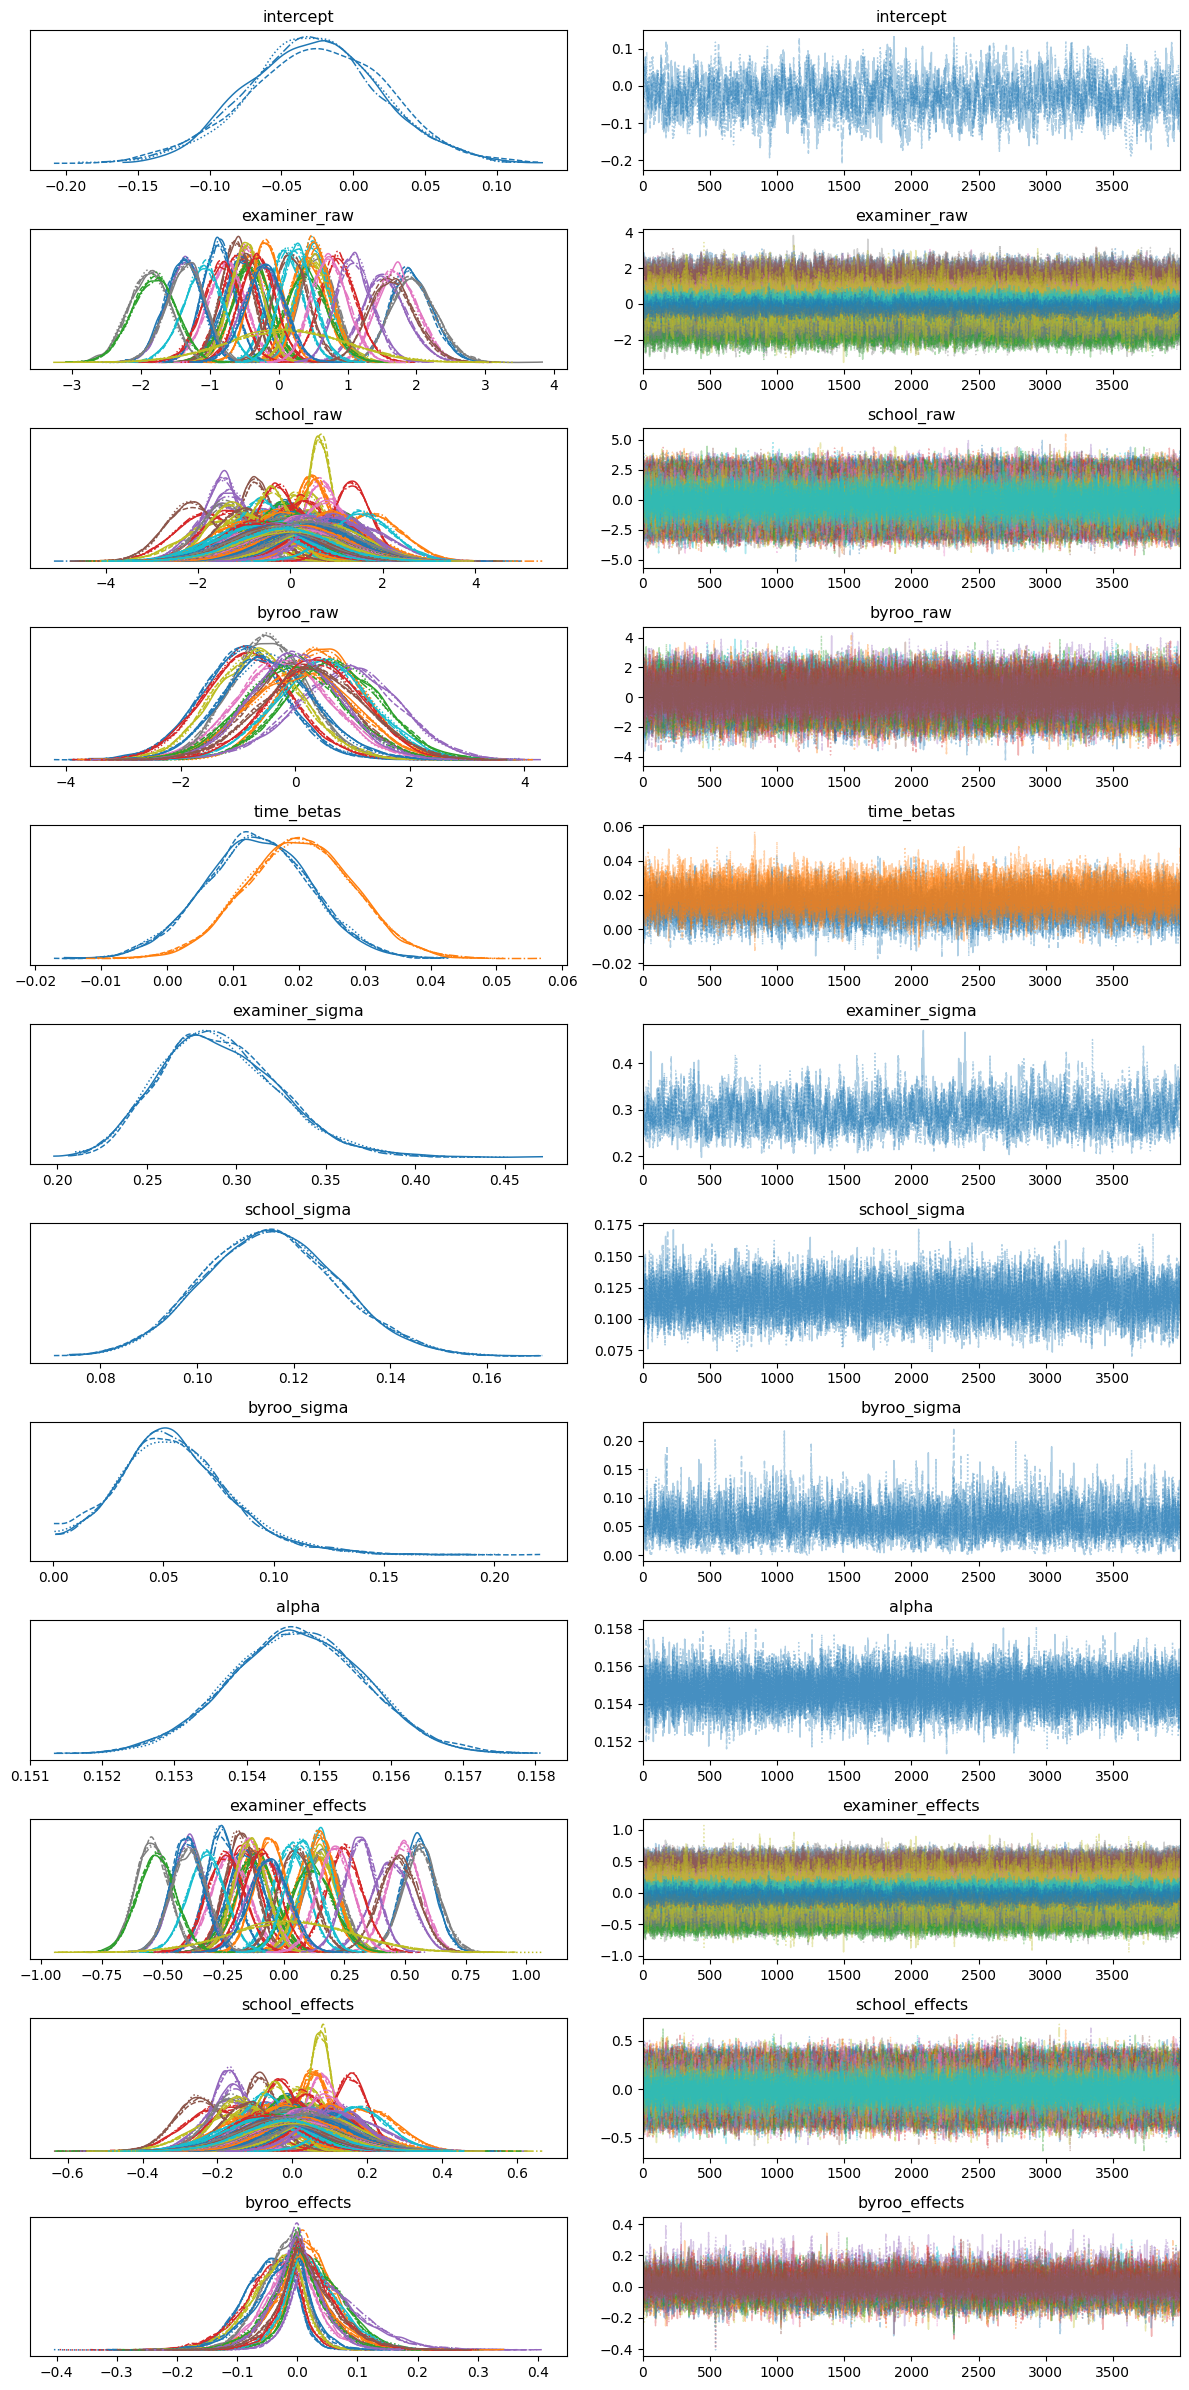

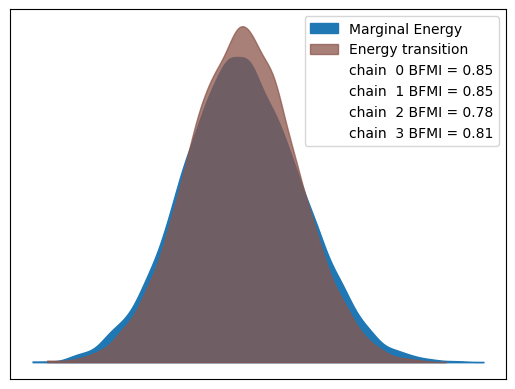


Number of divergent samples:
<xarray.DataArray 'diverging' ()> Size: 8B
array(0)


In [51]:
# Basic convergence diagnostics
print("\nModel Parameter Summary:")
summary = az.summary(trace, kind='diagnostics')

# Plot trace diagnostics
az.plot_trace(trace)
plt.tight_layout()
plt.show()

# Plot energy diagnostics
az.plot_energy(trace)
plt.show()

# Check for divergences
print("\nNumber of divergent samples:")
print(trace.sample_stats.diverging.sum())

In [52]:
df_summary[df_summary.r_hat>1.01]

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat


## Save trace

In [ ]:
# Save as netCDF file (recommended)
trace.to_netcdf("models/soidueksam_b_kat.nc")

# Or save as pickle file

with open('models/soidueksam_b_kat.pkl', 'wb') as buff:
    pickle.dump(trace, buff)

## Load trace

In [32]:
trace = az.from_netcdf("models/soidueksam_b_kat.nc")

## overall exam success

In [33]:
def get_average_success_probability(trace):
    # Get intercept (baseline)
    intercept = trace.posterior['intercept'].values
    
    # Convert to probability using inverse logit
    baseline_prob = 1 / (1 + np.exp(-intercept))
    
    # Calculate summary statistics
    results = {
        'mean': np.mean(baseline_prob),
        'std': np.std(baseline_prob),
        'lower_ci': np.percentile(baseline_prob, 2.5),
        'upper_ci': np.percentile(baseline_prob, 97.5)
    }
    
    print("Overall Success Probability:")
    print(f"Mean: {results['mean']:.3f}")
    print(f"95% CI: [{results['lower_ci']:.3f}, {results['upper_ci']:.3f}]")
    
    return results

average_prob = get_average_success_probability(trace)
average_prob

Overall Success Probability:
Mean: 0.493
95% CI: [0.470, 0.517]


{'mean': 0.49325914332182674,
 'std': 0.0117801451901191,
 'lower_ci': 0.4698159453477343,
 'upper_ci': 0.5166394743313426}

In [34]:
df_b_sub.y.mean()

0.47578422365139783

## Factors that contribute the most

<Figure size 1800x500 with 0 Axes>

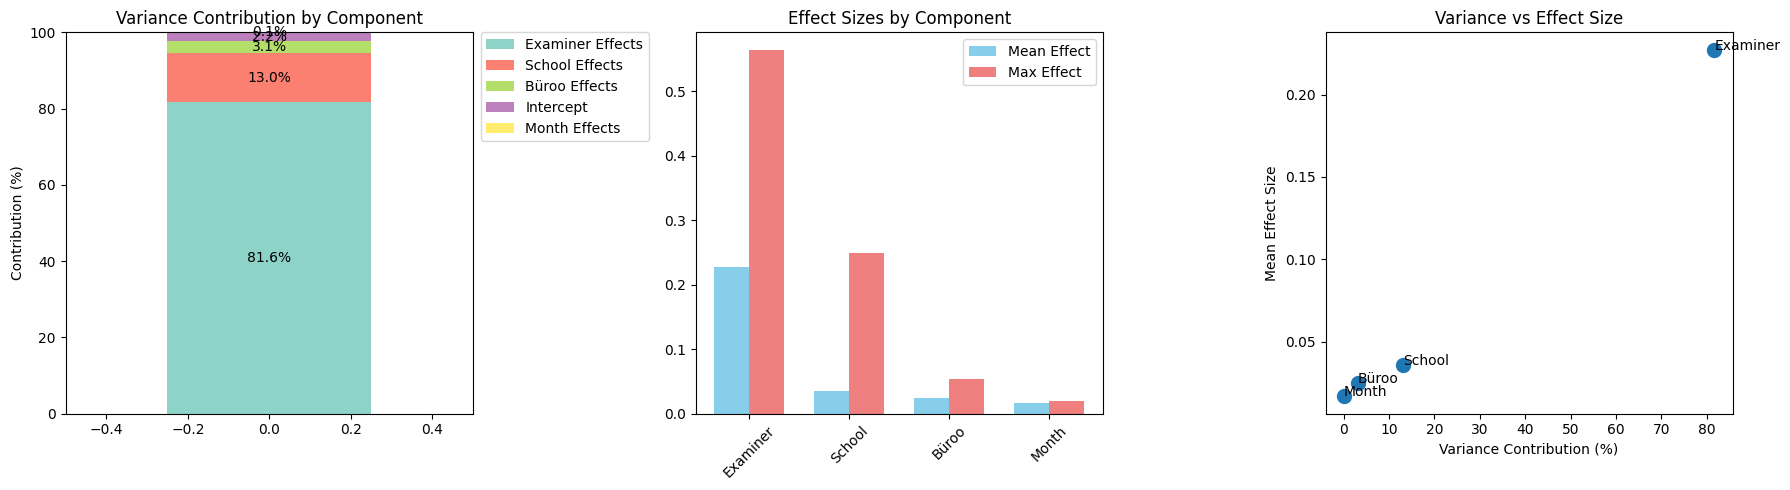

In [35]:
def analyze_component_contributions(trace):
    # Get components
    intercept_var = np.var(trace.posterior['intercept'].values)
    examiner_var = np.var(trace.posterior['examiner_effects'].values.reshape(-1))
    school_var = np.var(trace.posterior['school_effects'].values.reshape(-1))
    byroo_var = np.var(trace.posterior['byroo_effects'].values.reshape(-1))
    time_var = np.var(trace.posterior['time_betas'].values.reshape(-1))

    
    # Calculate total variance
    total_var = intercept_var + examiner_var + school_var + byroo_var + time_var
    
    # Calculate proportions
    contributions = pd.Series({
        'Intercept': intercept_var/total_var,
        'Examiner Effects': examiner_var/total_var,
        'School Effects': school_var/total_var,
        'Büroo Effects': byroo_var/total_var,
        'Month Effects':time_var/total_var,
    })
    
    return contributions * 100  # Convert to percentages

def analyze_effect_sizes(trace, return_df=False):
    # Get absolute mean effects
    examiner_effects = np.abs(np.mean(trace.posterior['examiner_effects'].values, axis=(0,1)))
    school_effects = np.abs(np.mean(trace.posterior['school_effects'].values, axis=(0,1)))
    byroo_effects = np.abs(np.mean(trace.posterior['byroo_effects'].values, axis=(0,1)))
    month_effects = np.abs(np.mean(trace.posterior['time_betas'].values, axis=(0,1)))

    result={
        'Examiner': {'mean': examiner_effects.mean(), 'max': examiner_effects.max()},
        'School': {'mean': school_effects.mean(), 'max': school_effects.max()},
        'Büroo': {'mean': byroo_effects.mean(), 'max': byroo_effects.max()},
        'Month': {'mean': month_effects.mean(), 'max': month_effects.max()}
    }
    
    if return_df:
        return pd.DataFrame(result)
    return result


def plot_model_contributions(trace):
    # Get contributions
    contributions = analyze_component_contributions(trace)
    contributions=contributions.sort_values(ascending=False)
    
    
    # Create figure with more width for legend
    plt.figure(figsize=(18, 5))
    
    # Create figure with more width for legend
    plt.figure(figsize=(18, 5))
    
    # 1. Stacked Bar Plot
    plt.subplot(131)
    colors = plt.cm.Set3(np.linspace(0, 1, len(contributions)))
    
    # Create bars one by one to properly set up legend
    bottom = 0
    bars = []
    for i, (name, value) in enumerate(contributions.items()):
        bar = plt.bar(0, value, bottom=bottom, color=colors[i], width=0.5, label=name)
        plt.text(0, bottom + value/2, f'{value:.1f}%', ha='center', va='center')
        bottom += value
        bars.append(bar)
    
    plt.xlim(-0.5, 0.5)
    plt.ylim(0, 100)
    plt.ylabel('Contribution (%)')
    plt.title('Variance Contribution by Component')
    
    # Add legend
    plt.legend(bbox_to_anchor=(1.02, 1), 
              loc='upper left',
              borderaxespad=0)
    
    # 2. Bar Plot with Effect Sizes
    effect_sizes = analyze_effect_sizes(trace)
    plt.subplot(132)
    components = list(effect_sizes.keys())
    means = [d['mean'] for d in effect_sizes.values()]
    maxes = [d['max'] for d in effect_sizes.values()]
    
    x = np.arange(len(components))
    width = 0.35
    
    plt.bar(x - width/2, means, width, label='Mean Effect', color='skyblue')
    plt.bar(x + width/2, maxes, width, label='Max Effect', color='lightcoral')
    plt.xticks(x, components, rotation=45)
    plt.title('Effect Sizes by Component')
    plt.legend()
    
    # 3. Scatter Plot: Variance vs Mean Effect
    plt.subplot(133)
    # Map component names to contribution names
    name_map = {
        'Examiner': 'Examiner Effects',
        'Büroo': 'Büroo Effects',
        'School': 'School Effects',
        'Month': 'Month Effects'
        
    }
    matched_contributions = [contributions[name_map[c]] for c in components]
    
    plt.scatter(matched_contributions, means, s=100)
    for i, txt in enumerate(components):
        plt.annotate(txt, (matched_contributions[i], means[i]))
    plt.xlabel('Variance Contribution (%)')
    plt.ylabel('Mean Effect Size')
    plt.title('Variance vs Effect Size')
    
    plt.tight_layout()
    plt.show()
    
plot_model_contributions(trace)

## Visualize effect contributions


Probability changes:
Intercept: -0.007
Examiner: 0.136
School: -0.012
Bureau: -0.012
Time: 0.009

Final probability: 0.614
Actual outcome: 1.000


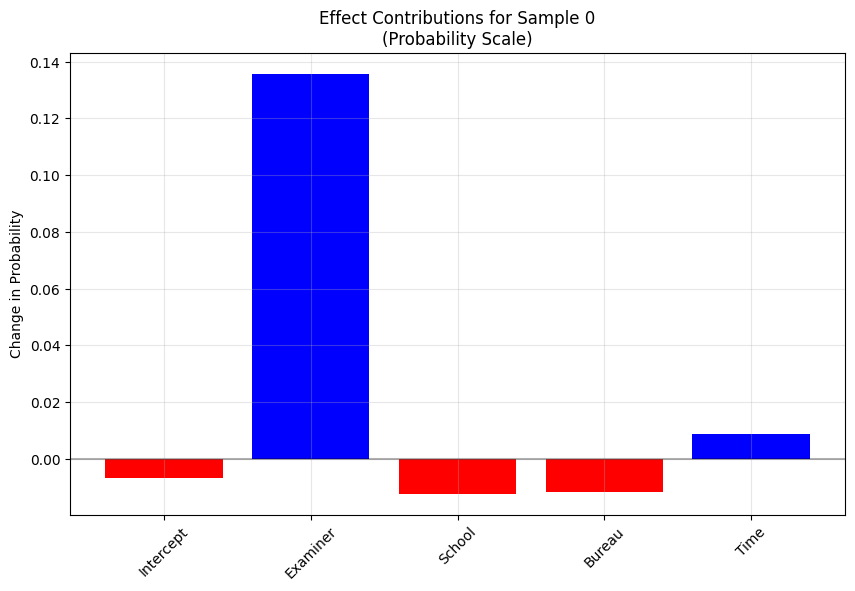

In [36]:
# Get posterior means
examiner_effects_mean = trace.posterior['examiner_effects'].mean(dim=('chain', 'draw'))
school_effects_mean = trace.posterior['school_effects'].mean(dim=('chain', 'draw'))
byroo_effects_mean = trace.posterior['byroo_effects'].mean(dim=('chain', 'draw'))
time_effects_mean = np.dot(df_b_sub[time_features], trace.posterior['time_betas'].mean(dim=('chain', 'draw')))
intercept_mean = float(trace.posterior['intercept'].mean())

def plot_effects_breakdown_prob(sample_idx):
    # Get base effects (logit scale)
    effects = {
        'Intercept': intercept_mean,
        'Examiner': examiner_effects_mean[df_b_sub['examiner_idx'].iloc[sample_idx]],
        'School': school_effects_mean[df_b_sub['school_idx'].iloc[sample_idx]],
        'Bureau': byroo_effects_mean[df_b_sub['byroo_idx'].iloc[sample_idx]],
        'Time': time_effects_mean[sample_idx]
    }
    
    # Convert to probability changes
    prob_changes = {}
    cumulative = 0
    for k, v in effects.items():
        prev_prob = sp.expit(cumulative)
        cumulative += v
        new_prob = sp.expit(cumulative)
        prob_changes[k] = new_prob - prev_prob
    
    # Plot
    plt.figure(figsize=(10, 6))
    colors = ['blue' if v >= 0 else 'red' for v in prob_changes.values()]
    plt.bar(prob_changes.keys(), prob_changes.values(), color=colors)
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    plt.title(f'Effect Contributions for Sample {sample_idx}\n(Probability Scale)')
    plt.ylabel('Change in Probability')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    
    # Print values
    print("\nProbability changes:")
    for k, v in prob_changes.items():
        print(f"{k}: {v:.3f}")
    print(f"\nFinal probability: {sp.expit(sum(effects.values())):.3f}")
    print(f"Actual outcome: {df_b_sub['y_transformed'].iloc[sample_idx]:.3f}")
    
plot_effects_breakdown_prob(0)


Probability changes:
Intercept: -0.007
Examiner: -0.028
School: 0.013
Bureau: 0.006
Time: 0.005

Final probability: 0.489
Actual outcome: 0.000


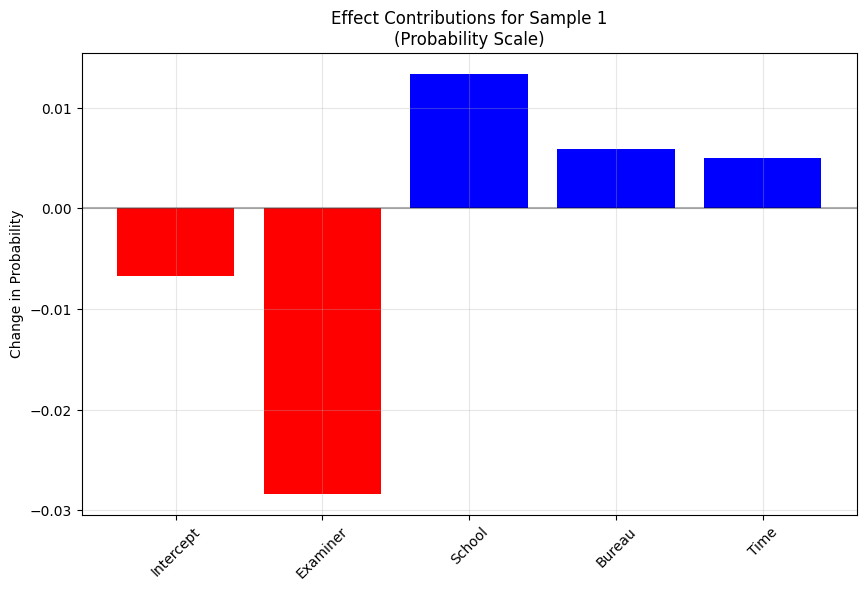

In [37]:
plot_effects_breakdown_prob(1)


Probability changes:
Intercept: -0.007
Examiner: -0.097
School: 0.018
Bureau: 0.006
Time: 0.009

Final probability: 0.430
Actual outcome: 1.000


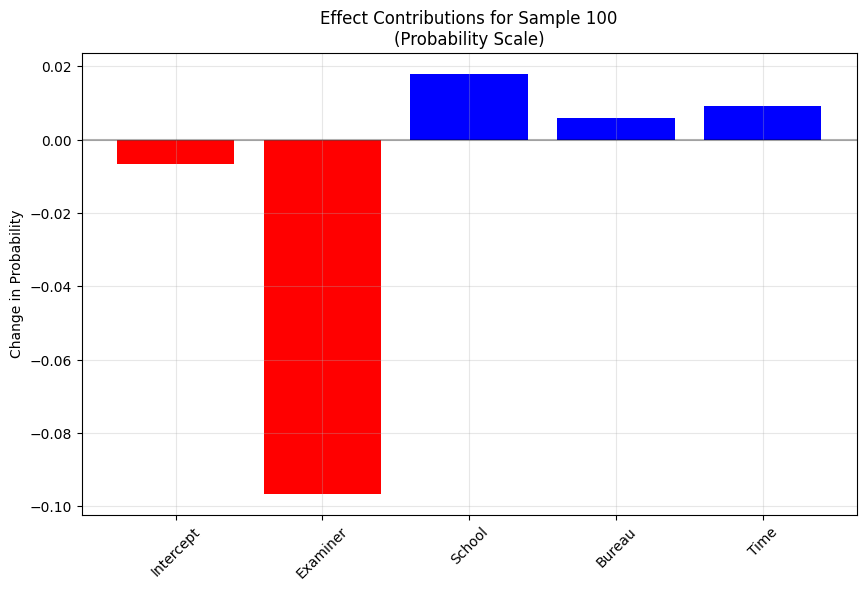

In [38]:
plot_effects_breakdown_prob(100)

## Examiner effects

Number of examiner_idx with significant positive effect: 11
Number of examiner_idx with significant negative effect: 14


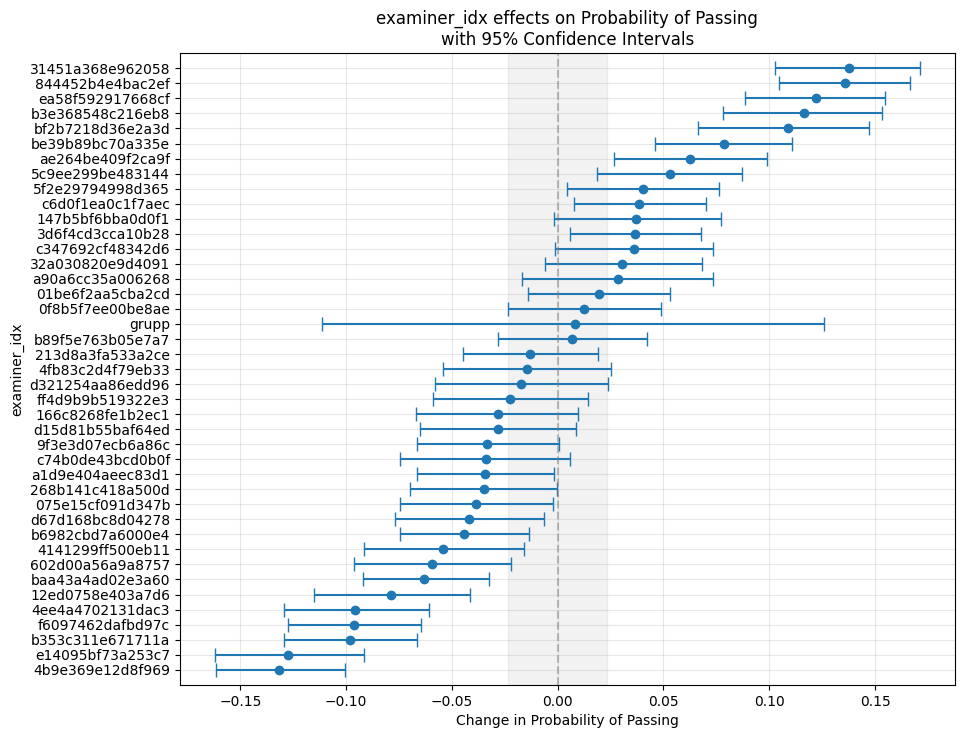

In [39]:
def plot_effects(y_labels_col='examiner_idx', effects_key='examiner_effects', only_significant=False,
                y_dict=None):
# Get all samples for examiner effects
    examiner_samples = trace.posterior[effects_key]
    
    # Get examiner IDs (assuming they're in the original order in df_b_sub)
    examiner_ids = df_b_sub[y_labels_col].unique()
    
    # Calculate mean and HDI for each examiner
    means = []
    hdis = []
    ids = []  # Store IDs in same order as effects
    labels=[]
    
    # Convert logit effects to probability changes
    base_prob = sp.expit(intercept_mean)
    
    for i in range(examiner_samples.shape[2]):
        effect_samples = examiner_samples[:, :, i].values.flatten()
        prob_changes = sp.expit(intercept_mean + effect_samples) - base_prob
        percentiles=np.percentile(prob_changes, [2.5, 97.5])
        if only_significant and ((percentiles[0]<0.0 and percentiles[1]<0.0) or (percentiles[0]>0.0 and percentiles[1]>0.0)):
            means.append(np.mean(prob_changes))
            hdis.append(percentiles)
            ids.append(examiner_ids[i])
            if y_dict is not None:
                labels.append(y_dict[examiner_ids[i]])
        elif not only_significant:
            means.append(np.mean(prob_changes))
            hdis.append(percentiles)
            ids.append(examiner_ids[i])
            if y_dict is not None:
                labels.append(y_dict[examiner_ids[i]])
    
    # Sort by mean effect
    sorted_indices = np.argsort(means)
    means = np.array(means)[sorted_indices]
    hdis = np.array(hdis)[sorted_indices]
    ids = np.array(ids)[sorted_indices]
    if len(labels)>0:
        labels = np.array(labels)[sorted_indices]
    
    # Calculate confidence interval for baseline probability
    intercept_samples = trace.posterior['intercept'].values.flatten()
    base_probs = sp.expit(intercept_samples)
    base_ci = np.percentile(base_probs, [2.5, 97.5])
    
    # Plot
    plt.figure(figsize=(10, len(means)*0.2))
    
    # Add shaded confidence interval around zero
    plt.axvspan(-base_ci[1] + base_prob, -base_ci[0] + base_prob, 
                color='grey', alpha=0.1, label='Baseline CI')
    
    # Plot effects
    plt.errorbar(means, range(len(means)),
                xerr=[means - hdis[:, 0], hdis[:, 1] - means],
                fmt='o', capsize=5)
    plt.axvline(x=0, color='grey', linestyle='--', alpha=0.5)
       
    # Add examiner IDs to y-axis
    if y_dict is not None:
        plt.yticks(range(len(means)), labels)
    else:
        plt.yticks(range(len(means)), ids)
     # Adjust y-axis limits to remove extra margins
    plt.ylim(-1.0, len(means))  # This removes the extra space
    
    plt.ylabel(y_labels_col)
    plt.xlabel('Change in Probability of Passing')
    plt.title(f'{y_labels_col} effects on Probability of Passing\nwith 95% Confidence Intervals')
    plt.grid(True, alpha=0.3)
    
    # Print summary statistics
    print(f"Number of {y_labels_col} with significant positive effect: {sum(hdis[:, 0] > 0)}")
    print(f"Number of {y_labels_col} with significant negative effect: {sum(hdis[:, 1] < 0)}")
    
    
plot_effects(y_dict=idx_to_examiner)

## School effects

Number of school_idx with significant positive effect: 4
Number of school_idx with significant negative effect: 8


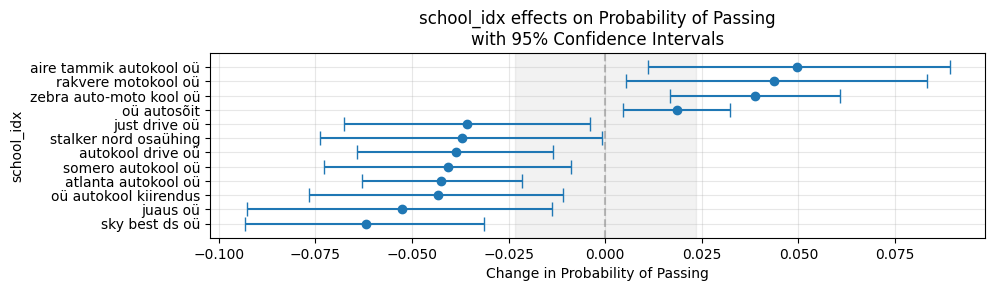

In [40]:
plot_effects(y_labels_col='school_idx', effects_key='school_effects', only_significant=True,
             y_dict=idx_to_school)

## Büroo effects

Number of byroo_idx with significant positive effect: 0
Number of byroo_idx with significant negative effect: 0


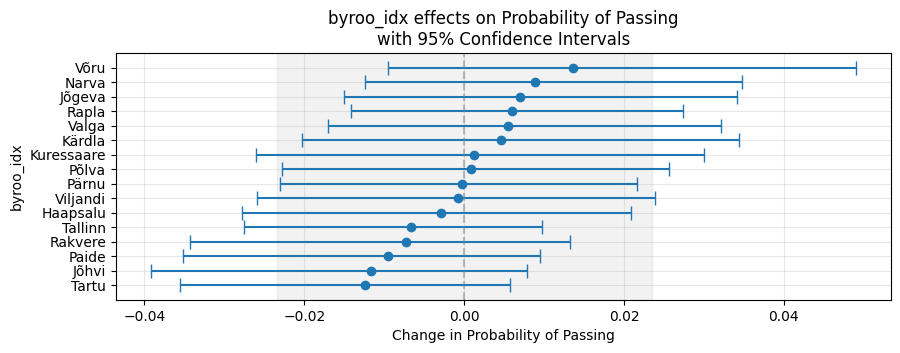

In [41]:
plot_effects(y_labels_col='byroo_idx', effects_key='byroo_effects', only_significant=False,
             y_dict=idx_to_byroo)

## Time effects

In [43]:
def plot_separate_time_effects_with_ci():
    # Get time coefficients and all samples
    time_betas_samples = trace.posterior['time_betas'].values
    
    # Create figure with two subplots
    fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
    
    # Create time points
    days = np.linspace(1, 365, 100)
    month_in_year = days / 365 * 12
    
    # Calculate monthly cyclical features
    month_sin = np.sin(2 * np.pi * month_in_year / 12)
    month_cos = np.cos(2 * np.pi * month_in_year / 12)
    
    # Calculate effects for all samples
    n_samples = time_betas_samples.shape[0] * time_betas_samples.shape[1]
    month_effects = np.zeros((n_samples, len(days)))
    
    # Reshape samples for easier processing
    time_betas_flat = time_betas_samples.reshape(-1, time_betas_samples.shape[-1])
    
    # Calculate monthly effects for all samples
    for i, sample in enumerate(time_betas_flat):
        month_effect = (sample[0] * month_sin + sample[1] * month_cos)
        month_effects[i] = sp.expit(intercept_mean + month_effect) - sp.expit(intercept_mean)
    
    # Calculate mean and confidence intervals
    month_mean = np.mean(month_effects, axis=0)
    month_ci = np.percentile(month_effects, [3, 97], axis=0)
    
    # Plot monthly effect with CI
    ax1.plot(days, month_mean, label='Monthly Effect', color='blue')
    ax1.fill_between(days, month_ci[0], month_ci[1], alpha=0.2, color='blue')
    ax1.axhline(y=0, color='red', linestyle='--', alpha=0.5)
    ax1.set_xlabel('Day of Year')
    ax1.set_ylabel('Change in Probability')
    ax1.set_title('Monthly Seasonal Effect with 94% CI')
    ax1.grid(True, alpha=0.3)
    
    # Add month labels
    month_positions = np.linspace(1, 365, 12)
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                  'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    ax1.set_xticks(month_positions)
    ax1.set_xticklabels(month_names)
    
    # Print the ranges of effects with CI
    print(f"Monthly effect range: {month_mean.min():.3f} to {month_mean.max():.3f}")
    print(f"Monthly CI width: {np.mean(month_ci[1] - month_ci[0]):.3f}")

Monthly effect range: -0.006 to 0.006
Monthly CI width: 0.008


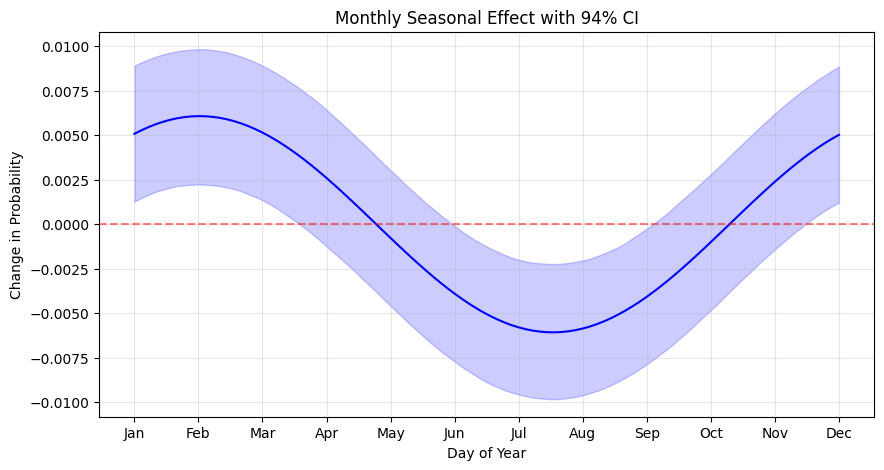

In [44]:
plot_separate_time_effects_with_ci()